In [81]:
import numpy as np
from astropy.cosmology import WMAP9 as cosmo

cosmo.comoving_distance(z=0.55)

<Quantity 2080.47740748 Mpc>

In [82]:
cosmo.luminosity_distance(z=2.1)

<Quantity 16855.09481854 Mpc>

In [83]:
# Exercice 8.1 Galaxy Flux

import astropy.units as u

d = cosmo.luminosity_distance(z=2.5)
f = 10**10 * u.Lsun / (4 * np.pi * d**2)
f.to(u.erg / u.s / u.cm**2)

<Quantity 7.35433552e-16 erg / (s cm2)>

In [84]:
d_A = cosmo.angular_diameter_distance(z=0.8)
d_A

<Quantity 1574.62956404 Mpc>

In [85]:
((0.1 * u.arcsec.to(u.rad) * d_A).to(u.kpc))

<Quantity 0.76340196 kpc>

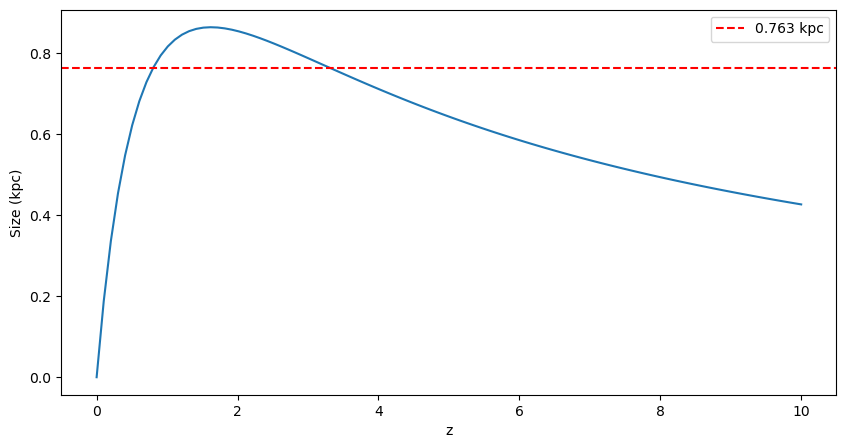

In [86]:
import matplotlib.pyplot as plt

z = np.linspace(0, 10, 100)
d = cosmo.angular_diameter_distance(z=z)
s = (0.1 * u.arcsec.to(u.rad) * d).to(u.kpc)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(z, s)
ax.axhline(y=0.763, color="r", linestyle="--", label="0.763 kpc")
ax.set_xlabel("z")
ax.set_ylabel("Size (kpc)")
ax.legend()

In [87]:
target_value = 0.763 * u.kpc
index = np.abs(s - target_value).argmin()
closest_z = z[index]
print(f"The closest z value corresponding to 0.763 kpc is {closest_z:.3f}")

The closest z value corresponding to 0.763 kpc is 3.333


In [88]:
closest_d = cosmo.angular_diameter_distance(z=closest_z)
closest_s = (0.1 * u.arcsec.to(u.rad) * closest_d).to(u.kpc)
print(f"The distance for z = {closest_z:.3f} is indeed {closest_s:.3f} (verification)")

The distance for z = 3.333 is indeed 0.763 kpc (verification)


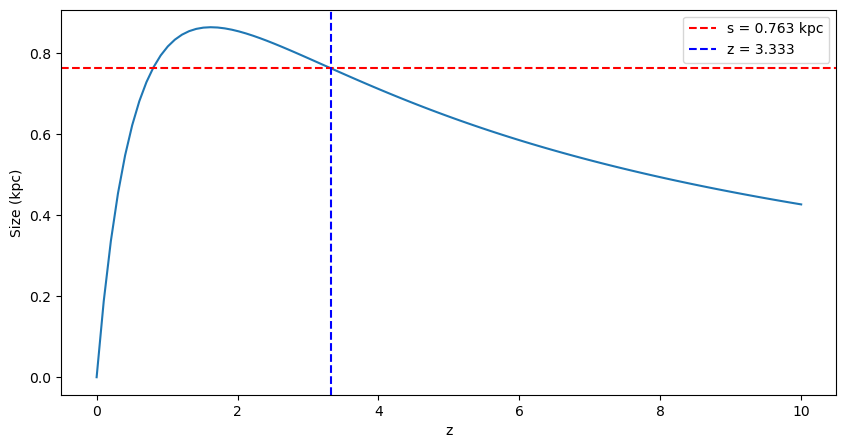

In [89]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(z, s)
ax.axhline(y=0.763, color="r", linestyle="--", label="s = 0.763 kpc")
ax.axvline(x=closest_z, color="b", linestyle="--", label=f"z = {closest_z:.3f}")
ax.set_xlabel("z")
ax.set_ylabel("Size (kpc)")
ax.legend()